# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': cutomer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection, preprocessing, metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [10]:
path = 'advertising.csv'
data = pd.read_csv('advertising.csv')


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [42]:
data["Timestamp"]

0      2016-03-27 00:53:11
1      2016-04-04 01:39:02
2      2016-03-13 20:35:42
3      2016-01-10 02:31:19
4      2016-06-03 03:36:18
              ...         
995    2016-02-11 21:49:00
996    2016-04-22 02:07:01
997    2016-02-01 17:24:57
998    2016-03-24 02:35:54
999    2016-06-03 21:43:21
Name: Timestamp, Length: 1000, dtype: object

In [47]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [43]:
data["Male"].value_counts()

0    519
1    481
Name: Male, dtype: int64

Para ver en MALE poruqeel 50% es 0.5

In [46]:
np.percentile(data["Male"], 51)

0.0

In [44]:
np.percentile(data["Male"], 52)

1.0

In [12]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


# 1. Exploratory Data Analysis

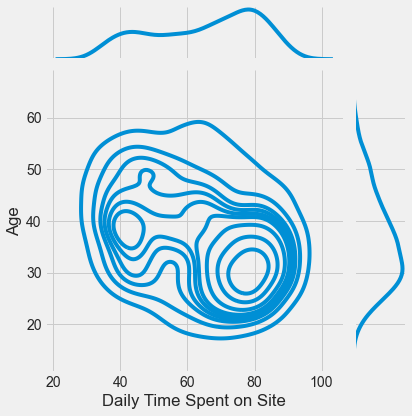

In [49]:
sns.jointplot(data["Daily Time Spent on Site"], data["Age"], kind="kde")

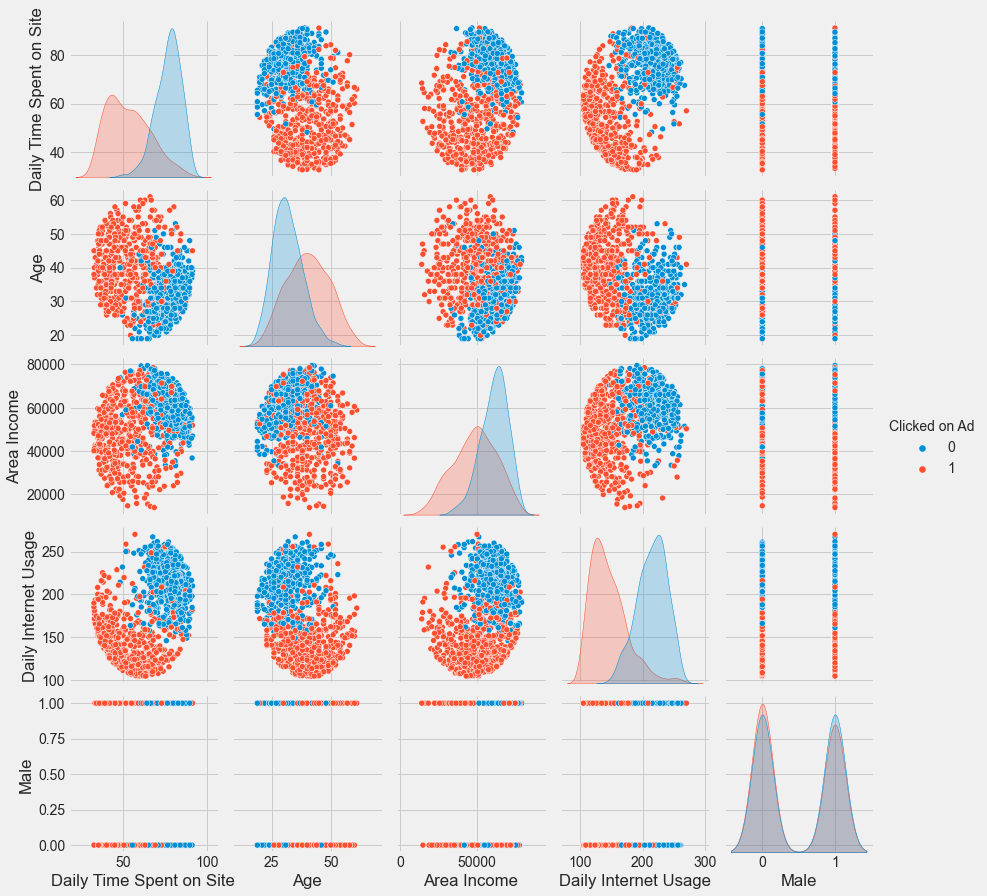

In [50]:
sns.pairplot(data, hue= "Clicked on Ad")

Los valores salen de manera circular porque es un csv limpio de valores min y maximos

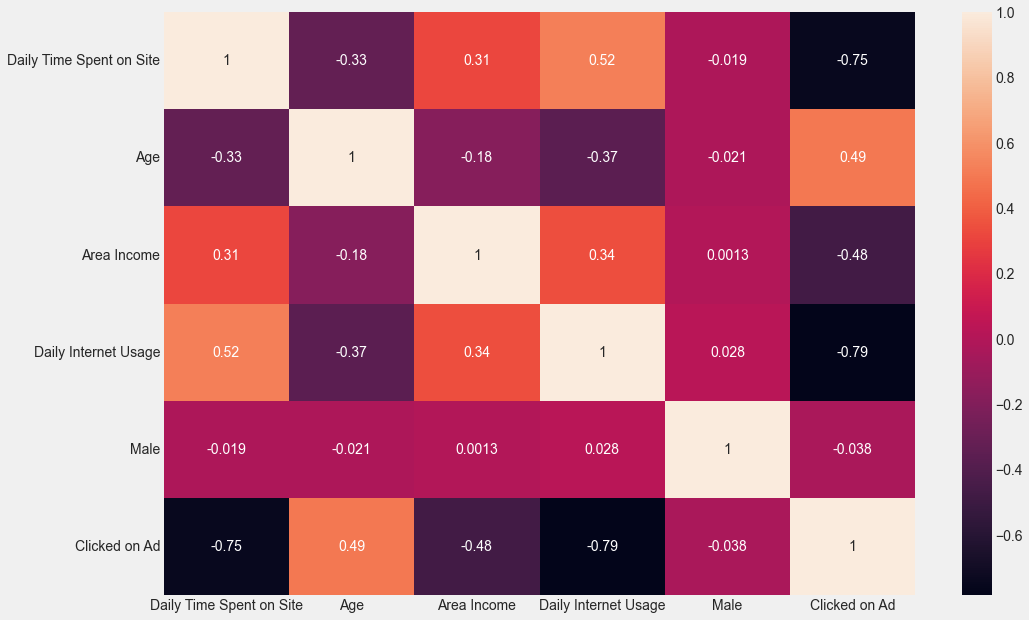

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True);

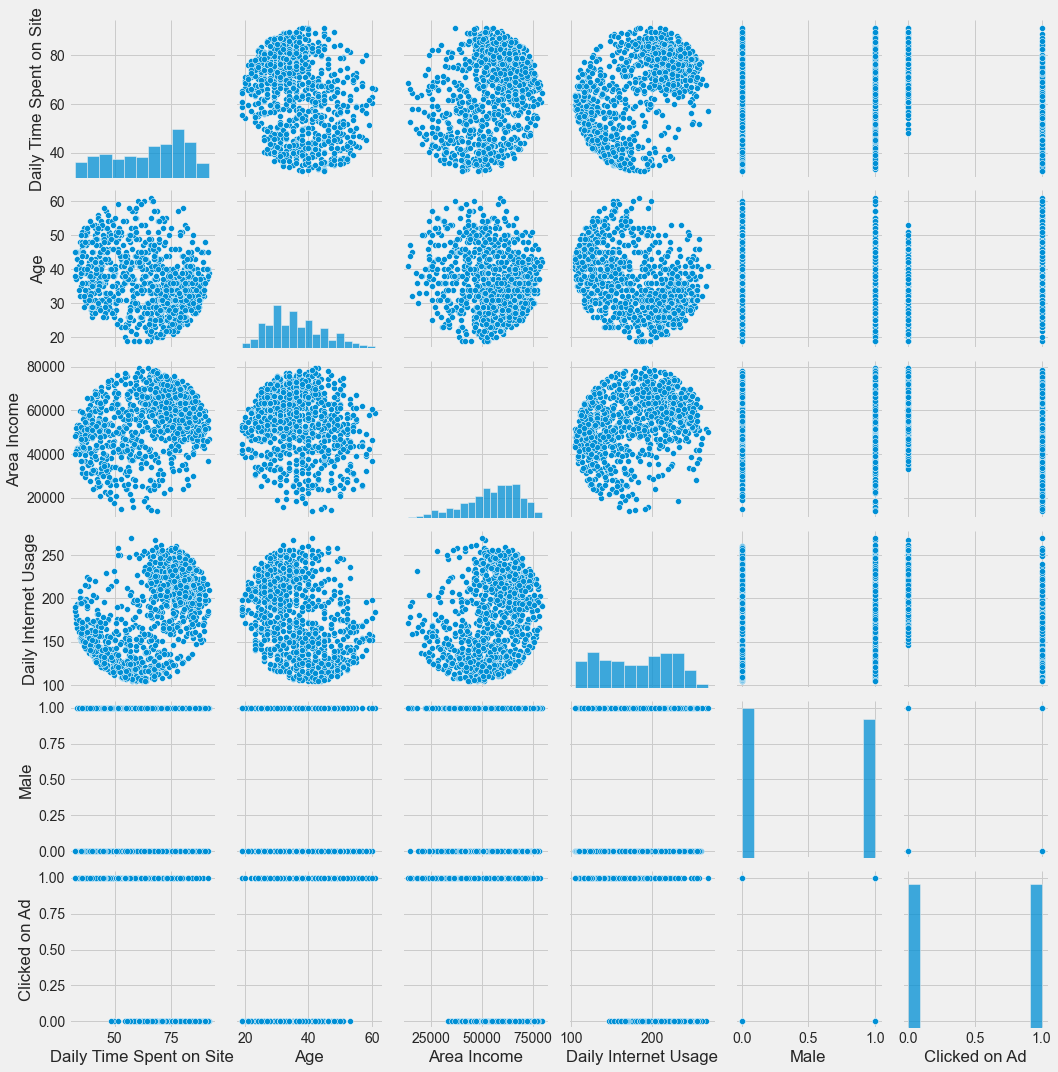

In [ ]:
sns.pairplot(data);

# 2. Prepare Data for Logistic Regression


In [13]:
data_clic = data.drop(['Clicked on Ad'], 1)
data_clic

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54


In [52]:
le = preprocessing.LabelEncoder()
le.fit(data["City"])
data["City_le"] = le.transform(data["City"])

In [53]:
le = preprocessing.LabelEncoder()
le.fit(data["Country"])
data["Country_le"] = le.transform(data["Country"])

In [59]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,City_le,Country_le
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,961,215
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,903,147
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,111,184


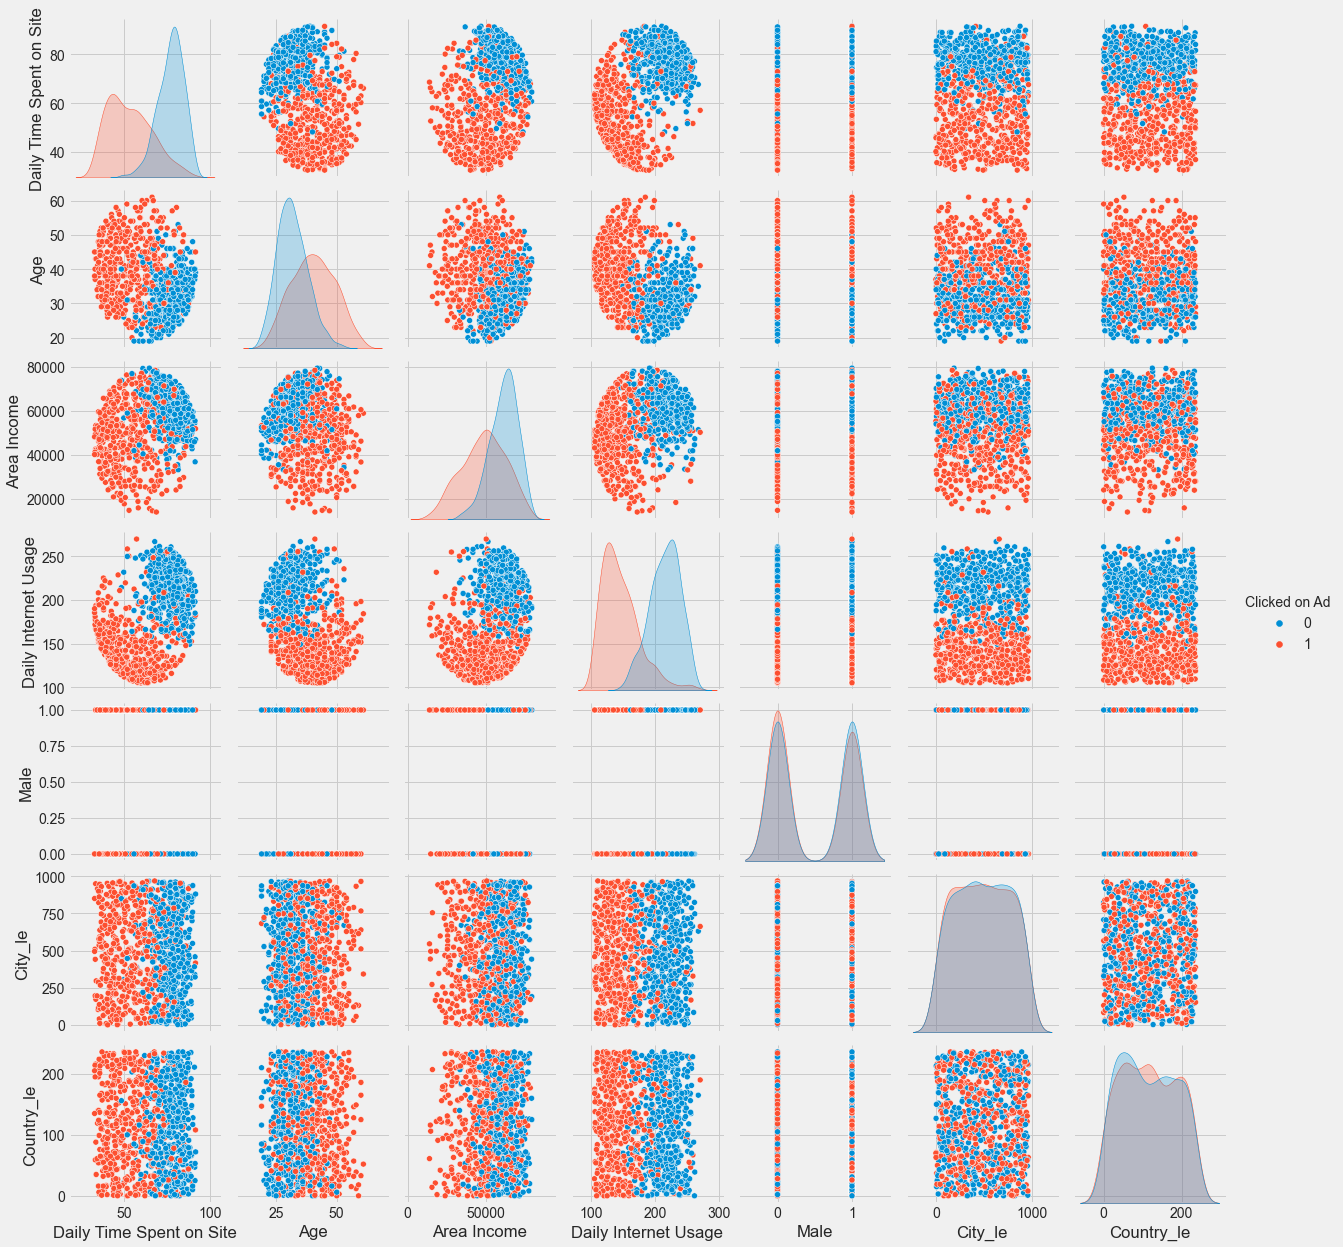

In [60]:
sns.pairplot(data, hue= "Clicked on Ad")

Vemos que estas categorias no aportan mucha informacion. 

Podemos separar la columna de tiempo a ver si nos aportan datos

In [63]:
data["Timestamp"]=pd.to_datetime(data["Timestamp"])

In [71]:
data["Timestamp_day"]= data["Timestamp"].dt.day
data["Timestamp_month"]= data["Timestamp"].dt.month
data["Timestamp_hour"]= data["Timestamp"].dt.hour
data["Timestamp_minute"]= data["Timestamp"].dt.minute
#data["Timestamp_weekdate"]= data["Timestamp"].dt.weekdate

Buscar las oras de noche y crear 1 si es de noche

In [70]:
data["Timestamp_noche"]= np.where(data["Timestamp_hour"]<8,1,0)

In [72]:
data[["Timestamp", "Timestamp_day", "Timestamp_month", "Timestamp_hour", "Timestamp_minute", "Timestamp_noche"]]

,Timestamp,Timestamp_day,Timestamp_month,Timestamp_hour,Timestamp_minute,Timestamp_noche
0,2016-03-27 00:53:11,27,3,0,53,1
1,2016-04-04 01:39:02,4,4,1,39,1
2,2016-03-13 20:35:42,13,3,20,35,0
3,2016-01-10 02:31:19,10,1,2,31,1
4,2016-06-03 03:36:18,3,6,3,36,1
...,...,...,...,...,...,...
995,2016-02-11 21:49:00,11,2,21,49,0
996,2016-04-22 02:07:01,22,4,2,7,1
997,2016-02-01 17:24:57,1,2,17,24,0
998,2016-03-24 02:35:54,24,3,2,35,1


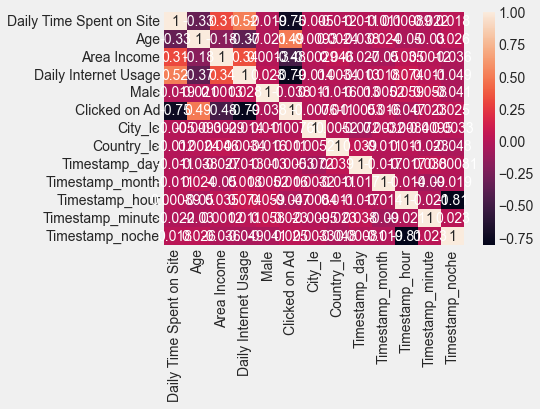

In [73]:
sns.heatmap(data.corr(), annot=True);

Asi que seguimos usando las columnas en categoricas y no categoricas, tal como estaban al inicio, ya que estas variables realmente no nos portan mucho. 

In [56]:
categorical_cols = [cname for cname in data_clic.columns if data_clic[cname].dtype =="object"]
categorical_cols

['Ad Topic Line', 'City', 'Country', 'Timestamp']

In [57]:
numerical_cols = [cname for cname in data_clic.columns if data_clic[cname].dtype in ["int64", "float64"]]
numerical_cols

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male']

In [61]:
#my_cols = categorical_cols + numerical_cols


In [92]:
X = np.array(data_clic[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']])
X


array([[6.895000e+01, 3.500000e+01, 6.183390e+04, 2.560900e+02],
       [8.023000e+01, 3.100000e+01, 6.844185e+04, 1.937700e+02],
       [6.947000e+01, 2.600000e+01, 5.978594e+04, 2.365000e+02],
       ...,
       [5.163000e+01, 5.100000e+01, 4.241572e+04, 1.203700e+02],
       [5.555000e+01, 1.900000e+01, 4.192079e+04, 1.879500e+02],
       [4.501000e+01, 2.600000e+01, 2.987580e+04, 1.783500e+02]])

In [18]:
y = np.array(data['Clicked on Ad'])
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
model = linear_model.LogisticRegression(max_iter = 1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [94]:
predictions = model.predict(X)
print(predictions)

[0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1
 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0
 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1 1 0 

In [95]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.9  0.1 ]
 [0.93 0.07]
 [0.98 0.02]
 ...
 [0.   1.  ]
 [0.97 0.03]
 [0.67 0.33]]


In [96]:
model.score(X, y)

0.897

In [97]:
model.classes_

array([0, 1])


#### 1. Train test split

In [104]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.3,
                                                                    random_state=seed)
# test_size=validation_size, random_state=seed, 42

NOTA: Es mejor hacer el Split y luego Escalar

#### 2. StandardScaler()

In [105]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scal = std_scale.transform(X_train)

In [139]:
std_scale = preprocessing.StandardScaler().fit(X_test)
X_test_scal = std_scale.transform(X_test)

NOTA: Si quisiera quitar la transformacion lo haria con 
scaler.inverse_transform(X_test)

# 3. Implement Logistic Regression in Scikit-Learn and predict

In [107]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.88571429 0.95714286 0.85714286 0.92857143 0.91428571 0.88571429
 0.9        0.91428571 0.87142857 0.87142857]
Logistic Regression: 0.898571 (0.028891)


In [108]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.9


In [131]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 97.33 %
Error: 2.67 %


# 4. Evaluate models


In [136]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [111]:
score = logisticRegr.score(X_test, Y_test)
print(score * 100, "%")

97.33333333333334 %



#### 1. Confusion Matrix


In [112]:
predictions = logisticRegr.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
print(cm)

[[143   3]
 [  5 149]]


Si lo queremos sacar en porcentaje, podemos hacerlo de la siguiente manera

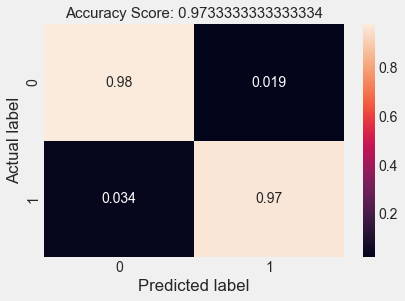

In [113]:
sns.heatmap(cm/cm.sum(axis=1), annot = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

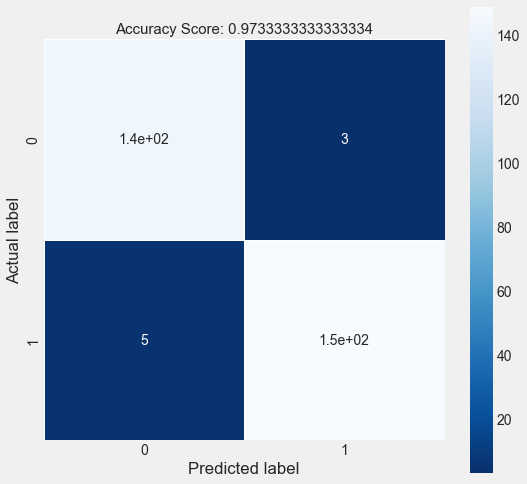

In [114]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [119]:
TP = 98
FP = 1.9
TN = 97
FN = 3.4


#### 2. Precision


In [116]:
metrics.precision_score(Y_test, predictions)

0.9802631578947368

Lo verificamos de manera manual 

In [120]:
Precision = TP / (TP + FP)
Precision

0.980980980980981



#### 3. Recall


In [121]:
metrics.recall_score(Y_test, predictions)

0.9675324675324676

Lo verificamos de manera manual 

In [122]:
Recall = TP / (TP+FN)
Recall

0.9664694280078895



#### 4. F1 Score


In [124]:
metrics.f1_score(Y_test, predictions)

0.9738562091503268

Lo verificamos de manera manual 

In [125]:
F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
F1_Score

0.9736711376055638



#### 5. ROC curve

In [126]:
metrics.roc_auc_score(Y_test, predictions)

0.9734922611634942

Lo verificamos de manera manual 

In [127]:
FPR = FP / (FP + TN)
FPR 

0.019211324570273

In [128]:
TPR = TP / (TP + FN)
TPR

0.9664694280078895

In [90]:
X_roc = FPR
Y_roc = TPR

Graficamos

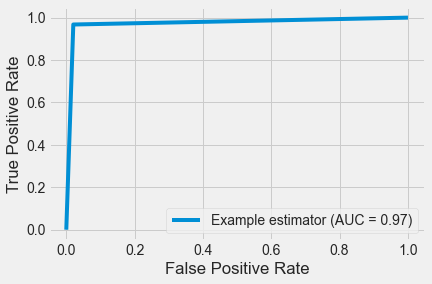

In [129]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
roc_auc = metrics.auc (fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name = "Example estimator")
display.plot()
plt.show()


# 5. Conclusions

Consideramos que son valores muy aceptables. Inclusive sin usar las variables categoricas (Ciudad, Pais, Sexo y Fechas). 

In [132]:
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
print(f"Precision: {Precision}")
print(f"Recall: {Recall}")
print(f"F1_Score: {F1_Score}")

Acierto: 97.33 %
Error: 2.67 %
Precision: 0.980980980980981
Recall: 0.9664694280078895
F1_Score: 0.9736711376055638


Si quisieramos ver los nuevos clientes:

In [140]:
X_new = pd.DataFrame({"Daily Time Spent on Site": [5], "Age": [26], "Area Income": [47031], "Daily Internet Usage": [138]})
logisticRegr.predict(std_scale.transform(X_new))

array([1])

Este cliente seria un CLICK!